### 1 Blockchain Data Structure (15 points)
Each blockchain starts with a genesis block. We will need to define this block function in object-oriented python. Here are the main Block components we will need:

Index - The index of the block on the chain (zero-indexed).
Timestamp – Time (T) when the block was added to the chain.
data - The data the block contains (Usually points to the root of a Merkel tree, but we can use a common thread for this).
previous_hash - The hash value of the previous block.
hash - Hash of this block computed using the hash_block function.
nonce - The variable value that we change to alter the hash output (Default value = 0, irrelevant in this section).
We will need to define two functions in class Object named Block, and the two functions are __init__() (called dunder init) and blockHash(). The init function takes six inputs, including a self, from the list above (#5 above is the output). The blockHash function takes inputs from init in a string form, appends them, and encodes them through a SHA256 function.

Import following libraries before developing the function hashlib, random, datetime, date, time, ipyparallel, numpy, matplotlib. Once done Copy the following code in new cell and run it. If you get valid block prompt your block code is correct.

In [2]:
import hashlib as hasher
import random as rand
import time
import datetime as date
import ipyparallel as ipp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
class Block:
    def __init__(self,index,timestamp,data, previous_hash,nonce=0):
        self.index=index
        self.timestamp = timestamp
        self.data= data
        self.nonce = nonce
        self.previous_hash=previous_hash
        self.hash=self.hash_block()

    def hash_block(self):
        sha=hasher.sha256()
        block_hash=(str(self.index) + 
                    str(self.timestamp) +
                    str(self.data) +
                    str(self.previous_hash) +
                    str(self.nonce)
                    )
        block_hash = block_hash.encode('utf-8')
        sha.update(block_hash)
        return sha.hexdigest()
        print(sha.hexdigest())

In [4]:
block_time = '2022-02-13 23:59:00'
data = 'Blockchain For Data Science'
previous_hash = '9136cfeb0c77b41e1e86cb9940ca9bb65f7aca4e8e366a8ecf9226b735e0c323'
index = 1
new_block= Block(index,block_time, data, previous_hash)
print(new_block.hash)

260b5039394689051b599484df495d79a6a33d22a3ca37af72656d8cdfc6fcd5


In [5]:
def block_validation(index, block_time, data, previous_hash):
    new_block = Block(index, block_time, data, previous_hash)
    check_string = '260b5039394689051b599484df495d79a6a33d22a3ca37af72656d8cdfc6fcd5'
    print_statement = "This is a valid Block" if str(new_block.hash) == check_string else "Please Check your work, this is incorrect."
    print(print_statement)
    
block_time = '2022-02-13 23:59:00'
data = 'Blockchain For Data Science'
previous_hash = '9136cfeb0c77b41e1e86cb9940ca9bb65f7aca4e8e366a8ecf9226b735e0c323'
index = 1
    
block_validation(index, block_time, data, previous_hash)

This is a valid Block


### 2 Creating a chain out of single blocks
Now that we have our class Block completed, we need to build a chain out of them. Define a function that creates a genesis_block(). This will generate the first block of the chain. Then create the function new_block(), which builds a new block on top of a given block.

The genesis_block() function has index = 0, timestamp = Now (whenever the function is being called), data = "Genesis Block", previous_hash = "0" and a return. Be careful with NOW function (it requires datetime from date package).

New_block() function will take inputs:

Last_block = an instance of class Block that is the block that we’re building our next block on top of
index = index of last_block + 1
timestamp = Now (whenever the function is being called)
data = “Block {index} generated” (for example block w/ index 5 would have data: “Block 5 generated”)
previous_hash = hash of last_block
Once the function is generated, use the following code to test the validity

In [6]:
def create_genesis_block():
    return Block(0,date.datetime.now(),"Genesis Block","0")

def next_block(last_block,nonce=0):
    this_index=last_block.index + 1
    this_timestamp = date.datetime.now()
    this_data = "Block "+ str(this_index)+ " generated"
    this_prevhash= last_block.hash
    return Block(this_index, this_timestamp, this_data,this_prevhash)

genesis_block=create_genesis_block()


In [7]:
def genesis_validation(genesis_block):
    block_1 = next_block(genesis_block)
    if block_1.index == 1 and block_1.data == "Block 1 generated" and block_1.previous_hash == genesis_block.hash and str(type(block_1.timestamp)) == "<class 'datetime.datetime'>":
        print("Valid Genesis block" )
    else:
        print("Check the code, not a valid genesis block:(")

genesis_validation(genesis_block)

Valid Genesis block


### 3 Generating a complete Blockchain
We now have a complete program required to create a chain. We need variables blockchain, previous_block, and num_blocks functions to generate a chain for a specified number of blocks. Use num_blocks as 10.

Blockchain is used to initialize with the genesis block inside, initialied as a list.
previous_block – points to the genesis block
num_blocks – the specific number of blocks to add to the chain. For the assignment, use 10.
We want to complete the implementation of the function complete_chain(). It will take the above three inputs, which correspond to the initializations that we made.

The function will need a for loop from 0 to numblocks. Inside the loop, we will use newblock() function from #2 to add to the block list.
Once the block is generated, we will append it to the blockchain array generated above.
We will now set the block from step 1 as previous_block.
Print ("the block #{} is added to the blockchain".format(addedblock.index)).
Print("Hash : {}\n".format(addedblock.hash)).
You will see ten blocks with their hashes.

In [8]:
blockchain=[create_genesis_block()]
previous_block = blockchain[0]

num_blocks=10

def complete_chain(num_blocks,blockchain,previous_block):
    for i in range(0, num_blocks):
        addedblock = next_block(previous_block)
        blockchain.append(addedblock)
        previous_block=addedblock

        print("Block #{} is added to the blockchain".format(addedblock.index))
        print("Hash : {}\n".format(addedblock.hash))

complete_chain(num_blocks,blockchain, previous_block)

Block #1 is added to the blockchain
Hash : dbf4f0a162da0342f2d13c2718428a23894cf4d9f9df5b9df3332f2d25a90735

Block #2 is added to the blockchain
Hash : 9247599f212611588b26a0377dbda49c3628eadcbf5343581cd1a1eebd6648e3

Block #3 is added to the blockchain
Hash : 7011b184220576378e1339dadc9f853c5202b18124d97e392228d56ea50be20a

Block #4 is added to the blockchain
Hash : 2a0cbafa8ff92fad88ddc4bada57c46d93159928497454782ab0ec130fb9fc75

Block #5 is added to the blockchain
Hash : 7dad9d9d1dee8be9dac207093572028260475fe9f52791c68fb40a8b08f8562b

Block #6 is added to the blockchain
Hash : 4d5c9c74f651153545c7407ff0f0fc58c981a0e665e17bf8331a8745e2020ef8

Block #7 is added to the blockchain
Hash : 2a26ddd011a6cfe9184d9446dc521b270532c5eb82e58c2d024394a13bb28a86

Block #8 is added to the blockchain
Hash : 4bf3a647f6536b1ffebfae059556477a59797e0d352bc433a29b6897c8b3e70a

Block #9 is added to the blockchain
Hash : b96d2ff4cf1eb99c0d743668780bd0adde7c790f31d7b481c330a4f47cedec19

Block #10 is added 

### 4 Nonce and Difficulty
Now let’s make the blockchain more realistic by adding the proof-of-work consensus mechanism that Bitcoin’s Blockchain uses. We need to look at two concepts for proof of work simulation, Nonce, and Difficulty.

The Nonce – A randomly generated value added to the blocks to vary block hashes.
The network specifies the difficulty. We will set this for the assignment. It defines the valid hashes (number of) out of all possible values. Greater difficulty indicates a lower number of valid hashes.

#### 4.1 Define function generate_nonce()
There are multiple ways to develop generate_nonce(). Since this is a regular n digit random number, we can use any of the methods below. Although we just need one method, you might be able to explore the ones you like. Computers can not generate true random numbers, so they use pseudo-random numbers.

We can use randint function to generate a number between a and b. There is a limitation to this. What is that limitation?
nonce = secrets.token_urlsafe() generates cryptographically strong random numbers
and many others, explore.

#### 4.2 Define function generate_difficulty_bound()
This is a bit harder to conceptualize. Bitcoin usually look for the number of zeros in front of a hash to define the difficulty. See the note on Bitcoin Difficulty for this. The function takes only one argument generate_difficulty_bound(difficulty=1)

Initiate an empty string that will hold our difficulty hash
We now need to generate a hex string that starts with zeros of size equal to “difficulty.” So if difficulty =1, then the string will have 1 leading zero, difficulty=2 will have 2 leading zeros. Use a for loop to generate this and append it to the string in 1.
In the same function, define a for loop to append a hex character, F. This loop should run for the range of length (64-difficulty).
We also need to prepend 0x to the now completely formed string.
This function should return the integer value from the string with a base 16 (since this is a hex code).

#### 4.3 Engineer a nonce given the previous block’s hash and difficulty
The function find_next_block() tries different blocks with the same data, index etc. but different nonces that satisfy the difficulty metric specified. This function takes three arguments find_next_block(last_block, difficulty, nonce_length)

Create variable start_time = time.process_time().
Create a variable that stores generate_difficulty_bound(difficulty).
Create a variable that sets next_block(last_block).
Create a variable that stores the hashes tried and set the start value to `1 (hashtried=1). You will increment this in every loop.
Create a while loop that conditionally tests the hash of the new block (in hex, so int(new_block.hash, 16)) to be greater than the difficultybound variable from #2 above.
Create a variable nonce to store generate_nonce(nonce_length value)
Create a new_block variable that used Block() function from assignment 1 (sine you are using the same file as Assignment 1, it should be able to recognize the function).
Increment hashtried by 1 (hashtried +=1)
time_taken = time.process_time() – start_time will calculate the time for finding the block.
Return the value of time taken, hashtried, and new_block

In [9]:
#4.1 Define function generate_nonce()
def generate_nonce(length=20):
    return ''.join([str(rand.randint(0, 9)) for i in range(length)])

#4.2 Define function generate_difficulty_bound()
def generate_difficulty_bound(difficulty=1):
    diff_str=""
    for i in range(0,difficulty):
        diff_str+="0"
    for i in range(0,64-difficulty):
        diff_str+="F"
    diff_str = "0x"+diff_str
    return(int(diff_str,16))

#4.3 Engineer a nonce given the previous block’s hash and difficulty
def find_next_block(last_block, difficulty, nonce_length):
    difficulty_bound = generate_difficulty_bound(difficulty)
    start = time.process_time()
    new_block = next_block(last_block)
    hashes_tried = 1
    while int(new_block.hash,16) > difficulty_bound:
        nonce = generate_nonce(nonce_length)
        new_block = Block(new_block.index, new_block.timestamp, new_block.data, new_block.previous_hash, nonce)
        hashes_tried += 1
    time_taken = time.process_time() - start   
    return time_taken, hashes_tried, new_block

#### 4.4 Blockchain with proof of work
We now need to create a blockchain with proof of work simulation.

Create a function create_blockchain that takes variables
num_blocks
difficulty
blockchain
previous_block
nonce_length
broadcast=1
Initiate two arrays to store hash and time so we can record the details.
Initiate a for loop to run for number of blocks (0, numblocks)
Set the timetaken, hashestried, block_to_add to take values from find_next_block function from #4.3
Append block_to_add to the blockchain array
Set previousblock to be newly generated block (block_to_add)
Append hash tried to hasharray
Append time taken to time time
Time to broadcast this to the network (broadcast=1, default value) is a binary input that prints:
Block number added to the chain
Number of hashes tried before solving the puzzle
Time to find the block
Hash of the current block
Returns the hash and, time arrays


In [10]:
#4.4 Blockchain with proof of work
blockchain = [create_genesis_block()]
previous_block = blockchain[0]
num_blocks = 20
difficulty = 3 
nonce_length = 10

def create_blockchain(num_blocks, difficulty, blockchain, previous_block, nonce_length, broadcast=1):
    hash_array = []
    time_array = []
    for i in range(0, num_blocks):
        time_taken, hashes_tried, block_to_add = find_next_block(previous_block, difficulty, nonce_length)
        blockchain.append(block_to_add)
        previous_block = block_to_add
        hash_array.append(hashes_tried)
        time_array.append(time_taken)
        if broadcast==1:
            print("Block #{} has been added to the blockchain!".format(block_to_add.index))
            print("{} Hashes Tried!".format(hashes_tried))
            print("Time taken to find block: {}".format(time_taken))
            print("Hash: {}\n".format(block_to_add.hash))     
    return(hash_array, time_array)

hash_array, time_array = create_blockchain(num_blocks, difficulty, blockchain, previous_block, nonce_length, broadcast=1)

Block #1 has been added to the blockchain!
5973 Hashes Tried!
Time taken to find block: 0.04564800000000002
Hash: 0002cc26ce3be6b0d122cda759f66624043a54b8a85097d116268e4681d00c4a

Block #2 has been added to the blockchain!
4708 Hashes Tried!
Time taken to find block: 0.03329599999999999
Hash: 000b715ba4d6d5ad1a7d7bfb8530a8a2883224b42c7ac62999863e05d5011a96

Block #3 has been added to the blockchain!
2367 Hashes Tried!
Time taken to find block: 0.01687799999999995
Hash: 0003330f977649eab81b4ad34a262c9992e5c4b21afcd565a289376a7a9e026d

Block #4 has been added to the blockchain!
7219 Hashes Tried!
Time taken to find block: 0.052071999999999896
Hash: 0001ab3f9f35f71851abedbb1d226ffff6823c1e9d9e6185572ab04a9f3c7da8

Block #5 has been added to the blockchain!
120 Hashes Tried!
Time taken to find block: 0.0009470000000000312
Hash: 000ebb11d72e326f1dea36754fa15a4b109fbb77a993f73976fcd36712ac6c24

Block #6 has been added to the blockchain!
14043 Hashes Tried!
Time taken to find block: 0.0996809

In [11]:
def blockchain_proof(blockchain, num_blocks):
    correct = True
    bound = generate_difficulty_bound(difficulty)
    if len(blockchain) != num_blocks + 1:
        correct = False
    for i in range(len(blockchain) - 1):
        if blockchain[i + 1].previous_hash != blockchain[i].hash:
            correct = False
            break
        if int(blockchain[i + 1].hash, 16) > bound:
            correct = False
            break
    print_statement = "PASSED!!! Move on to the next Part" if correct else "FAILED!!! Try Again :("
    print(print_statement)
            
blockchain_proof(blockchain, num_blocks)

PASSED!!! Move on to the next Part


### 5 Distributed Network
Using the following function, we will generate multiple miners. Please look at the code and explain what the entire class is doing (around two paragraphs)

In [12]:
#5 Distributed Network

class MinerNodeNaive: 
    def __init__(self, name, compute):
        self.name = name 
        self.compute = compute
    
    def try_hash(self, diff_value, chain):
        last_block = chain[-1]
        difficulty = generate_difficulty_bound(diff_value)
        date_now = date.datetime.now()
        this_index = last_block.index + 1
        this_timestamp = date_now
        this_data = "Hey! I'm block " + str(this_index)
        this_hash = last_block.hash
        new_block = Block(this_index, this_timestamp, this_data, this_hash)
        if int(new_block.hash, 16) < difficulty:
            chain.append(new_block)
            # Tell everyone about it!
            print("Block #{} has been added to the blockchain!".format(new_block.index))
            print("Block found by: {}".format(self.name))
            print("Hash: {}\n".format(new_block.hash))


#This class MinerNodeNaive defines a simple, naive blockchain miner node that can attempt to mine new blocks and add them to a blockchain. 
#The class is initialized with a name attribute to identify the node and a compute attribute that doesn't seem to be utilized within the class.
#The try_hash method takes in a difficulty value and a blockchain as arguments, and attempts to mine a new block using various parameters including a new index (one greater than the index of the last block in the chain), a timestamp indicating the current time, some placeholder data, and the hash of the previous block in the chain.

#### 5.1 Generate multiple mining peers
Generate five mining peers with different compute power. Use a for loop to generate an array of 5 miners; miners = [mine1, mine2, mine3, mine4, mine5]

Use comp_pow = random.randint to generate random numbers and assign them to five peers.
For each miner in miners and each number in comp_pow assign MinerNodeNaive() function

In [45]:
import random
# Initialize an empty list to store miners
miners = []

# Generate five miners with random compute power
for i in range(1, 6):
    miner_name = f"mine{i}"
    comp_pow = random.randint(1, 10)  # You can adjust the range as needed
    globals()[f"miner{i}"] = {'name': miner_name, 'compute_power': comp_pow}
    print(globals()[f"miner{i}"])
    globals()[f"miner{i}"] = MinerNodeNaive(globals()[f"miner{i}"]['name'],globals()[f"miner{i}"]['compute_power'])
    miners.append(globals()[f"miner{i}"])

miners

{'name': 'mine1', 'compute_power': 9}
{'name': 'mine2', 'compute_power': 6}
{'name': 'mine3', 'compute_power': 6}
{'name': 'mine4', 'compute_power': 1}
{'name': 'mine5', 'compute_power': 7}


#### 5.2 Create a compute and mining simulation

This function will create a random mining pool. Define compute_simulation(miners)

Create an empty array com_array.
Using a miner in miners and that miner’s compute power, replicate miner and append it to com_array, generating the random peer group.
Return this compute array.


In [46]:
def compute_simulation(miners):
    # create an empty array
    com_array = []

    for miner in miners:
        for i in range(miner.compute):
            com_array.append(miner.name)
    return com_array

compute_simulation_array = compute_simulation(miners)
random.shuffle(compute_simulation_array)

#### 5.3 Difficulty list
Generate an array, difficult_list, of random numbers between 2 to 6 spanning the length of the chain (number of blocks).

In [53]:
numblocks = 10
blockchain_distributed = [create_genesis_block()]
genesis_block_dist = blockchain_distributed[0]
difficult_list = [random.randint(2,6) for i in range(numblocks)]
print(difficult_list)

[3, 5, 6, 6, 6, 6, 5, 6, 4, 5]


#### 5.4 Simulation
Using the parameters below generate a blockchain

For the length of the chain (range(len(numblocks))) and while blockchain is smaller than numblocks+2.
Set next_miner = miner 2.
Sample from miners to pick one miner.
For miner in miners check if the sampled miner is same as miner name, if yes then set that miner as next_miner.
Calculate hash using next miner’s hash function (given above).

In [54]:
for i in range(len(difficult_list)):
    while len(blockchain_distributed) < i+2:
        next_miner = miner2
        sampled_miner = random.sample(compute_simulation_array,1)[0]
        for miner in miners:
            if sampled_miner == next_miner.name:
                next_miner = miner
        next_miner.try_hash(difficult_list[i], blockchain_distributed)

Block #1 has been added to the blockchain!
Block found by: mine2
Hash: 00053294d155b7d421f873961bd4e86e8deec7b8784287009ba45f73e100c142

Block #2 has been added to the blockchain!
Block found by: mine2
Hash: 00000dcd7a8713dabefb3588ce5a98e592e7f0d49e3f7d205c2fb2535b8bc07a

Block #3 has been added to the blockchain!
Block found by: mine2
Hash: 0000007868619f7062691e2b0dbc62c4a6b73bff1043fd2dde5f514d81da3e18

Block #4 has been added to the blockchain!
Block found by: mine2
Hash: 0000005581857eda8bf758ff1b9bbde607e2cb592fd8fa2b5a321ea437c7e261

Block #5 has been added to the blockchain!
Block found by: mine2
Hash: 0000007912a8741aa8c730447b227cae9d9bfe95ae54e4c389e438c789ec842a

Block #6 has been added to the blockchain!
Block found by: mine2
Hash: 0000000dc907c1ac20f80036d311e97c58316d5365e2e16eb8582963fb623584

Block #7 has been added to the blockchain!
Block found by: mine2
Hash: 000008d69105099553dd458723144b04d0a955e7a3c34e6fce0023390a2ab56b

Block #8 has been added to the blockchain

### 6 Analytics on the Blockchain Data

For each difficulty level below, use the given data and create_blockchain() function from #4.3

Extract hash array and time array
Plot all 5 hash arrays on one plot
Plot all 5 time arrays on one plot
Plot average of hash array
Plot average of time plot
Please make sure to have an appropriate plot title, x label, y, label, and legends to each plot.

In [69]:
blockchain = [create_genesis_block()]
previous_block = blockchain[0]
num_blocks = 40

# create different difficulty level
difficulty_0 = 1
difficulty_1 = 2
difficulty_2 = 3
difficulty_3 = 4
difficulty_4 = 5

nonce_length = 20

hash_array_0, time_array_0 = create_blockchain(num_blocks, difficulty_0, blockchain, previous_block, nonce_length, 0)
print("difficulty level {} complete".format(difficulty_0))
hash_array_1, time_array_1 = create_blockchain(num_blocks, difficulty_1, blockchain, previous_block, nonce_length, 0)
print("difficulty level {} complete".format(difficulty_1))
hash_array_2, time_array_2 = create_blockchain(num_blocks, difficulty_2, blockchain, previous_block, nonce_length, 0)
print("difficulty level {} complete".format(difficulty_2))
hash_array_3, time_array_3 = create_blockchain(num_blocks, difficulty_3, blockchain, previous_block, nonce_length, 0)
print("difficutly level {} complete".format(difficulty_4))
hash_array_4, time_array_4 = create_blockchain(num_blocks, difficulty_4, blockchain, previous_block, nonce_length, 0)
print("difficulty level {} complete".format(difficulty_4))

difficulty level 1 complete
difficulty level 2 complete
difficulty level 3 complete
difficutly level 5 complete
difficulty level 5 complete


In [71]:
mean_arr_hash = [np.mean(hash_array_0), np.mean(hash_array_1), np.mean(hash_array_2), np.mean(hash_array_3), np.mean(hash_array_4)]
mean_arr_time = [np.mean(time_array_0), np.mean(time_array_1), np.mean(time_array_2), np.mean(time_array_3), np.mean(time_array_4)]

Text(0.5, 1.0, 'Number of tries per block')

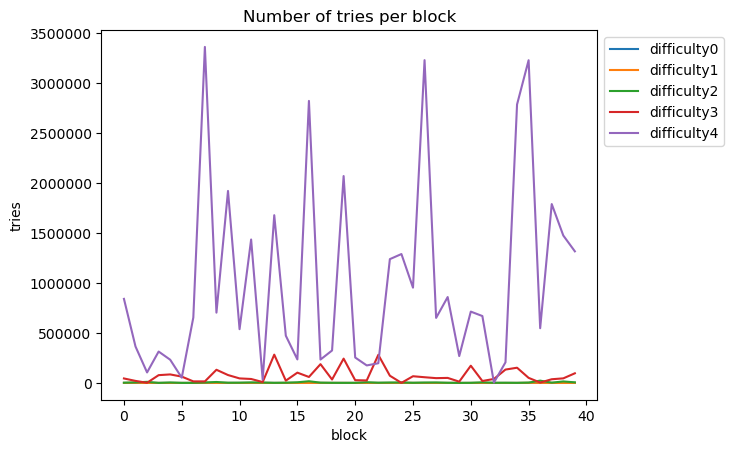

In [93]:
plt.plot(hash_array_0, label = 'difficulty0')
plt.plot(hash_array_1, label = 'difficulty1')
plt.plot(hash_array_2, label = 'difficulty2')
plt.plot(hash_array_3, label = 'difficulty3')
plt.plot(hash_array_4, label = 'difficulty4')
plt.legend()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('block')
plt.ylabel('tries')
plt.title('Number of tries per block')


Text(0.5, 1.0, 'Number of time consume per block')

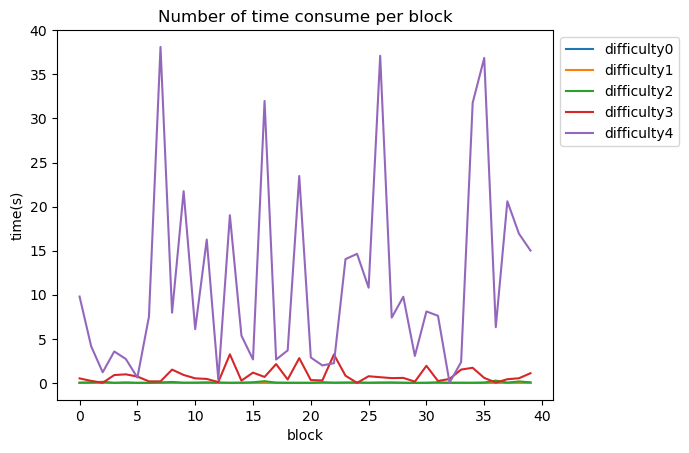

In [97]:
plt.plot(time_array_0, label = 'difficulty0')
plt.plot(time_array_1, label = 'difficulty1')
plt.plot(time_array_2, label = 'difficulty2')
plt.plot(time_array_3, label = 'difficulty3')
plt.plot(time_array_4, label = 'difficulty4')
plt.legend()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.ticklabel_format(style='plain', axis='y')
plt.xlabel('block')
plt.ylabel('time(s)')
plt.title('Number of time consume per block')

Text(0, 0.5, 'tries')

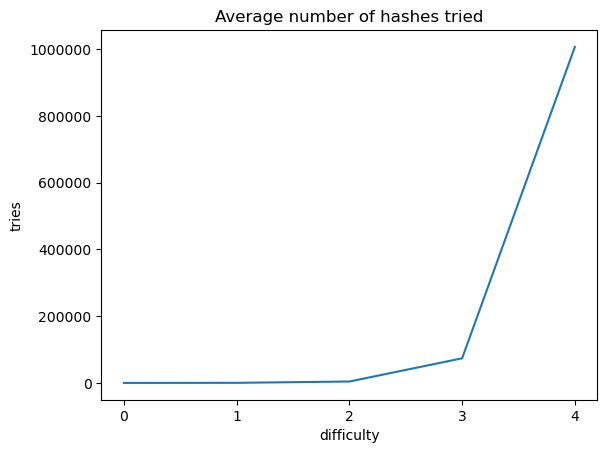

In [81]:
plt.plot(mean_arr_hash)
plt.title("Average number of hashes tried")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks([0, 1, 2, 3, 4])
plt.xlabel("difficulty")
plt.ylabel("tries")

Text(0, 0.5, 'time(s)')

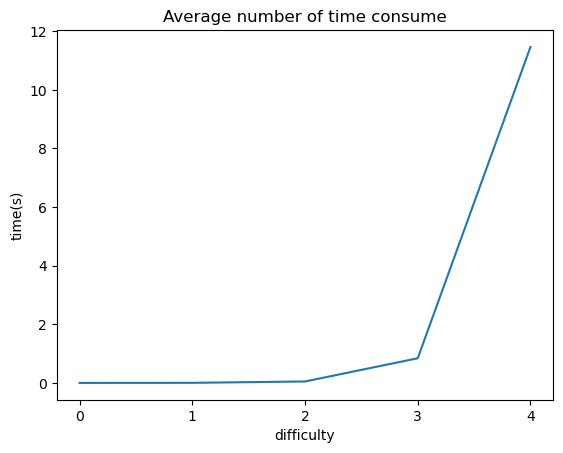

In [83]:
plt.plot(mean_arr_time)
plt.title("Average number of time consume")
plt.ticklabel_format(style='plain', axis='y')
plt.xticks([0, 1, 2, 3, 4])
plt.xlabel("difficulty")
plt.ylabel("time(s)")